In [3]:
import numpy as np
import csv
import sys
import plotly.express as pxl
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [4]:
filename = 'June.csv'

In [5]:
fields = []
rows = []

with open('June.csv', 'r') as csvfile:
    csvfile = csvfile.read().split('\n')
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)
data_o = pd.DataFrame(rows)

In [6]:
#locate Activities Data
df = data_o[data_o.eq('Activities').any(axis=1)]
df

,0,1,2,3,4,5,6,7,8,9


In [7]:
#Set dataframe with header of activities and following array
data_ah = data_o.iloc[0]
data_ab = data_o.iloc[1:31]
data = np.array(data_ab)
data = pd.DataFrame(data, columns=data_ah)
activ = data.replace(',','', regex=True)

In [8]:
activ.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-06-01,2648,11205,6.6,18,771,255,22,24,1331
1,2020-06-02,3118,13109,8.07,38,602,227,43,74,1807
2,2020-06-03,2794,12708,8.36,37,934,262,15,47,1531
3,2020-06-04,3221,17513,8.62,10,848,275,57,72,2009
4,2020-06-05,2789,7922,3.53,7,761,343,14,21,1519


In [9]:
#locate Sleep data
df = data_o[data_o.eq('Sleep').any(axis=1)]
df

,0,1,2,3,4,5,6,7,8,9
32,Sleep,None,None,None,None,None,None,None,None,None


In [10]:
#Set dataframe with header of sleep data and following array
data_hslp = data_o.iloc[33]
data_bslp = data_o.iloc[34:64]
data = np.array(data_bslp)
data = pd.DataFrame(data, columns=data_hslp)
data = data.replace(',','', regex=True)
sleep = data.iloc[::-1]

In [11]:
sleep.head()

33,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,NaN
29,2020-06-01 10:38PM,2020-06-02 4:15AM,290,47,18,337,58,200,32,None
28,2020-06-02 9:18PM,2020-06-02 11:55PM,136,21,5,157,N/A,N/A,N/A,None
27,2020-06-03 1:37AM,2020-06-03 4:39AM,153,29,16,182,9,119,25,None
26,2020-06-03 11:05PM,2020-06-04 2:13AM,150,38,13,188,15,92,43,None
25,2020-06-04 11:22PM,2020-06-05 4:23AM,255,46,22,301,16,207,32,None


## **Convering to numerical data**

Using 'Minutes Deep Sleep' requires the us to remove N/A cells. 

In [12]:
sleep["Minutes Deep Sleep"] = sleep["Minutes Deep Sleep"].replace('N/A', 0) 
sleep['Minutes Deep Sleep'] = sleep['Minutes Deep Sleep'].astype(str).astype(float)
mean = round(sleep['Minutes Deep Sleep'].mean(), 1)
sleep["Minutes Deep Sleep"] = sleep["Minutes Deep Sleep"].replace(0, mean)
sleep.head()

33,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,NaN
29,2020-06-01 10:38PM,2020-06-02 4:15AM,290,47,18,337,58,200,32.0,None
28,2020-06-02 9:18PM,2020-06-02 11:55PM,136,21,5,157,N/A,N/A,42.3,None
27,2020-06-03 1:37AM,2020-06-03 4:39AM,153,29,16,182,9,119,25.0,None
26,2020-06-03 11:05PM,2020-06-04 2:13AM,150,38,13,188,15,92,43.0,None
25,2020-06-04 11:22PM,2020-06-05 4:23AM,255,46,22,301,16,207,32.0,None


In [13]:
x1 = activ['Distance'].astype(str).astype(float)
y = sleep['Minutes Deep Sleep']

In [ ]:
plt.scatter(x1,y)
plt.xlabel('Distance',fontsize=20)
plt.ylabel('Minutes Deep Sleep',fontsize=20)
plt.show()

In [150]:
x1 = x1.values.reshape(-1,1)
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Minutes Deep Sleep   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4537
Date:                Wed, 29 Jul 2020   Prob (F-statistic):              0.506
Time:                        19:55:33   Log-Likelihood:                -124.74
No. Observations:                  30   AIC:                             253.5
Df Residuals:                      28   BIC:                             256.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8479      6.787      6.461      0.000      29.946      57.750
x1             0.7605      1.129      0.674      0.506      -1.552       3.073
==============================================================================
Omnibus:                        0.188   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.372
Skew:                           0.136   Prob(JB):                        0.830
Kurtosis:                       2.528   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

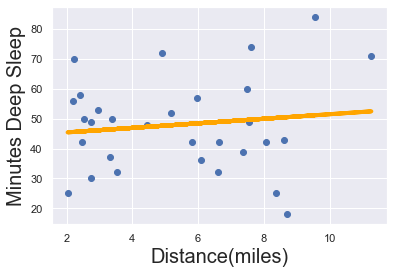

In [151]:
plt.scatter(x1,y)
yhat = x1*0.7605+43.8479
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Distance(miles)', fontsize = 20)
plt.ylabel('Minutes Deep Sleep', fontsize = 20)
plt.show()